In [1]:
!pip install -q kagglehub
import kagglehub
import pandas as pd

# Download student performance dataset. We'll try a well-known mirror:
path = kagglehub.dataset_download("uciml/student-alcohol-consumption")

print("✅ Downloaded to:", path)
!ls -l $path


Using Colab cache for faster access to the 'student-alcohol-consumption' dataset.
✅ Downloaded to: /kaggle/input/student-alcohol-consumption
total 116
-rw-r--r-- 1 1000 1000 41983 Oct 24 17:11 student-mat.csv
-rw-r--r-- 1 1000 1000   269 Oct 24 17:11 student-merge.R
-rw-r--r-- 1 1000 1000 68558 Oct 24 17:11 student-por.csv


In [2]:
import pandas as pd

df = pd.read_csv(f"{path}/student-mat.csv", sep=';')  # note: this dataset uses ';' as separator
df.head()
df.shape


(395, 1)

In [3]:
df.to_csv("student_performance.csv", index=False)


In [4]:
df['at_risk'] = (df['G3'] < 10).astype(int)
df['at_risk'].value_counts()


KeyError: 'G3'

In [5]:
df.columns.tolist()


['school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3']

In [6]:
df = pd.read_csv(f"{path}/student-mat.csv")  # no sep=';'
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df['at_risk'] = (df['G3'] < 10).astype(int)
df['at_risk'].value_counts()


,count
at_risk,
0,265
1,130


In [9]:
model_cols = ['age','sex','studytime','absences','failures','G1','G2','at_risk']
df_model = df[model_cols]


In [10]:
model_cols = [
    'age',
    'sex',
    'studytime',
    'absences',
    'failures',
    'G1',
    'G2',
    'at_risk'
]

df_model = df[model_cols].copy()
print("Modeling dataframe shape:", df_model.shape)
df_model.head()


Modeling dataframe shape: (395, 8)


,age,sex,studytime,absences,failures,G1,G2,at_risk
0,18,F,2,6,0,5,6,1
1,17,F,2,4,0,5,5,1
2,15,F,2,10,3,7,8,0
3,15,F,3,2,0,15,14,0
4,16,F,2,4,0,6,10,0


In [12]:
from sklearn.model_selection import train_test_split

X = df_model.drop('at_risk', axis=1)
y = df_model['at_risk']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("At risk % in train:", y_train.mean() * 100)
print("At risk % in test :", y_test.mean() * 100)



X_train shape: (316, 7)
X_test shape: (79, 7)
At risk % in train: 32.91139240506329
At risk % in test : 32.91139240506329


In [ ]:
Phase 2

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [14]:
# Basic info
print("Data Shape:", df_model.shape)
print("\nData Types:\n", df_model.dtypes)

# Summary statistics
df_model.describe(include='all').T


Data Shape: (395, 8)

Data Types:
 age           int64
sex          object
studytime     int64
absences      int64
failures      int64
G1            int64
G2            int64
at_risk       int64
dtype: object


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,395.0,NaN,NaN,NaN,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
sex,395,2,F,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,395.0,NaN,NaN,NaN,2.035443,0.83924,1.0,1.0,2.0,2.0,4.0
absences,395.0,NaN,NaN,NaN,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
failures,395.0,NaN,NaN,NaN,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
G1,395.0,NaN,NaN,NaN,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,NaN,NaN,NaN,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
at_risk,395.0,NaN,NaN,NaN,0.329114,0.470487,0.0,0.0,0.0,1.0,1.0


/tmp/ipython-input-501339358.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model, x='at_risk', palette='viridis')


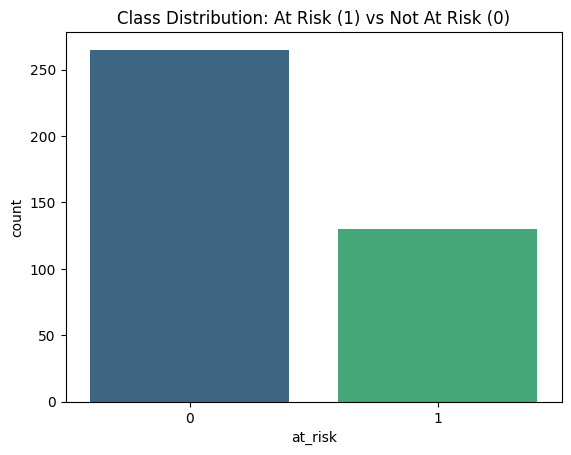

At-risk students: 32.91%


In [15]:
sns.countplot(data=df_model, x='at_risk', palette='viridis')
plt.title("Class Distribution: At Risk (1) vs Not At Risk (0)")
plt.show()

risk_ratio = df_model['at_risk'].mean() * 100
print(f"At-risk students: {risk_ratio:.2f}%")


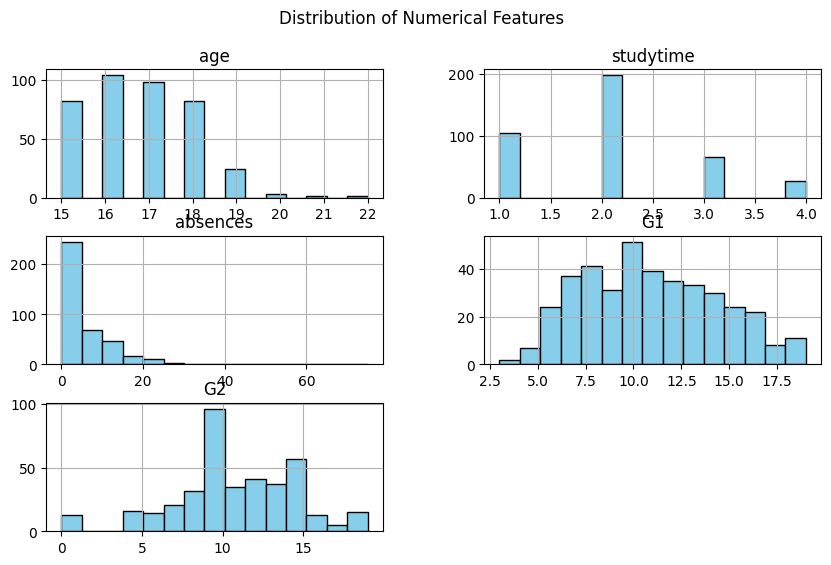

In [16]:
num_cols = ['age', 'studytime', 'absences', 'G1', 'G2']
df_model[num_cols].hist(figsize=(10, 6), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()


/tmp/ipython-input-2731460982.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='at_risk', y='studytime', palette='coolwarm')


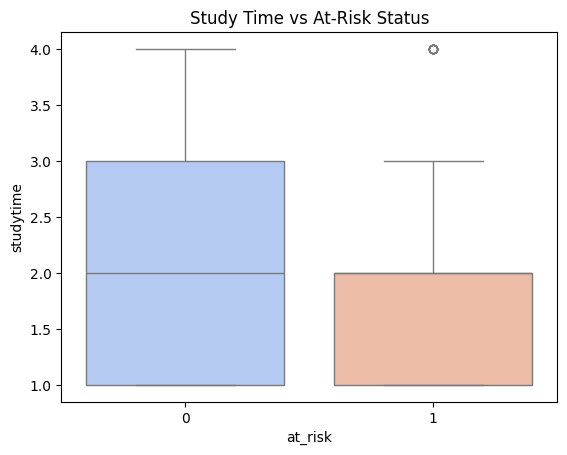

In [17]:
sns.boxplot(data=df_model, x='at_risk', y='studytime', palette='coolwarm')
plt.title("Study Time vs At-Risk Status")
plt.show()


/tmp/ipython-input-2252618209.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x='at_risk', y='absences', palette='coolwarm')


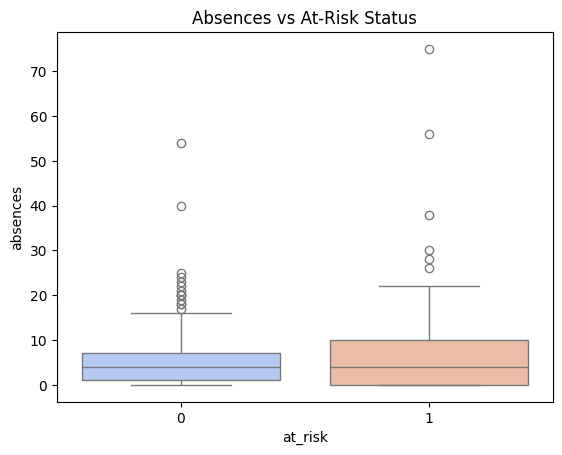

In [18]:
sns.boxplot(data=df_model, x='at_risk', y='absences', palette='coolwarm')
plt.title("Absences vs At-Risk Status")
plt.show()


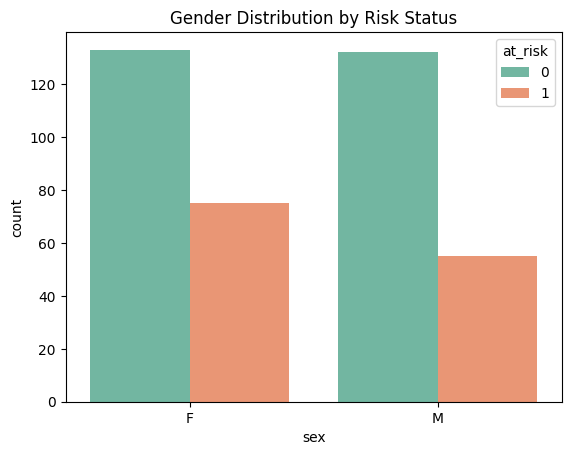

In [19]:
sns.countplot(data=df_model, x='sex', hue='at_risk', palette='Set2')
plt.title("Gender Distribution by Risk Status")
plt.show()


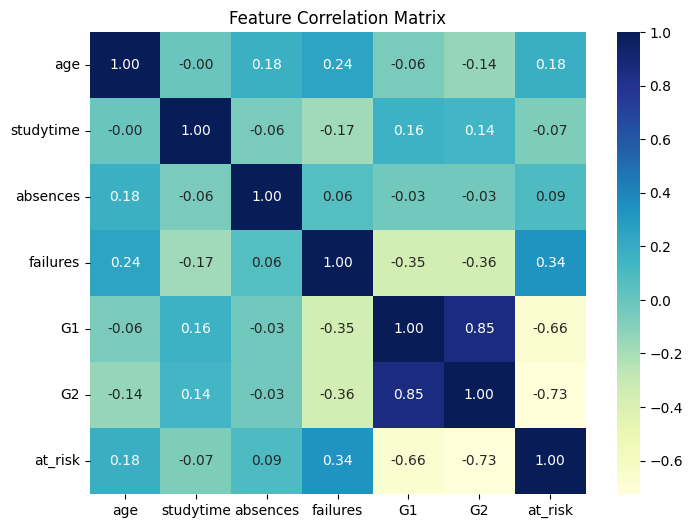

In [20]:
corr = df_model.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [21]:
# Reload main dataframe if needed
import pandas as pd

df_model = df[['age','sex','studytime','absences','failures','G1','G2','at_risk']].copy()


In [22]:
df_model.isnull().sum()


,0
age,0
sex,0
studytime,0
absences,0
failures,0
G1,0
G2,0
at_risk,0


In [23]:
df_model.fillna(df_model.median(numeric_only=True), inplace=True)


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model['sex'] = le.fit_transform(df_model['sex'])

df_model.head()


,age,sex,studytime,absences,failures,G1,G2,at_risk
0,18,0,2,6,0,5,6,1
1,17,0,2,4,0,5,5,1
2,15,0,2,10,3,7,8,0
3,15,0,3,2,0,15,14,0
4,16,0,2,4,0,6,10,0


In [25]:
df_model['avg_prior_grades'] = df_model[['G1','G2']].mean(axis=1)


In [26]:
df_model['absences_scaled'] = df_model['absences'] / df_model['absences'].max()


In [27]:
df_model.head()


,age,sex,studytime,absences,failures,G1,G2,at_risk,avg_prior_grades,absences_scaled
0,18,0,2,6,0,5,6,1,5.5,0.080000
1,17,0,2,4,0,5,5,1,5.0,0.053333
2,15,0,2,10,3,7,8,0,7.5,0.133333
3,15,0,3,2,0,15,14,0,14.5,0.026667
4,16,0,2,4,0,6,10,0,8.0,0.053333


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['age','studytime','absences_scaled','failures','G1','G2','avg_prior_grades']

df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])


In [29]:
X = df_model.drop('at_risk', axis=1)
y = df_model['at_risk']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (316, 9)
Test shape: (79, 9)


In [ ]:
phase 3

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# Fit and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    roc  = roc_auc_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1, roc])

# Create results dataframe
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1 Score","ROC AUC"])
results_df.sort_values(by="F1 Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.924051,0.954545,0.807692,0.875000,0.894412
2,Random Forest,0.898734,0.821429,0.884615,0.851852,0.895138
1,Decision Tree,0.873418,0.833333,0.769231,0.800000,0.846880


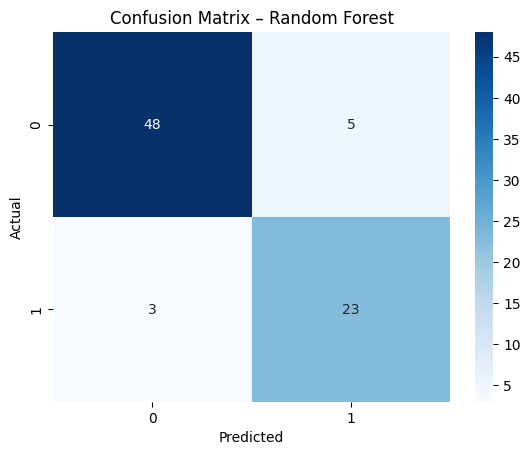

In [32]:
best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


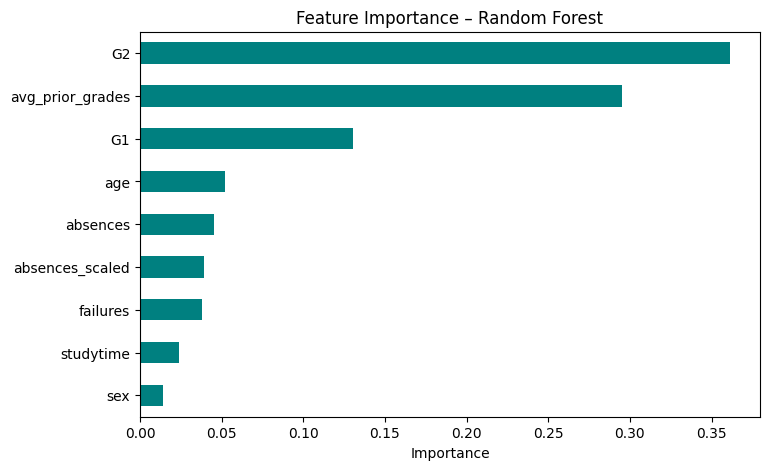

In [33]:
feat_imp = pd.Series(best_model.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), color='teal')
plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance")
plt.show()


In [34]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred_best))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred_best))


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.82      0.88      0.85        26

    accuracy                           0.90        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.90      0.90      0.90        79

ROC AUC Score: 0.8951378809869376


In [35]:
predictions = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred_best
})
predictions.to_csv("/content/semmamodel_predictions.csv", index=False)
print("✅ Predictions saved.")


✅ Predictions saved.


In [ ]:
phase 5

In [36]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

y_pred_final = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_final))
print("ROC AUC:", roc_auc_score(y_test, y_pred_final))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.82      0.88      0.85        26

    accuracy                           0.90        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.90      0.90      0.90        79

ROC AUC: 0.8951378809869376


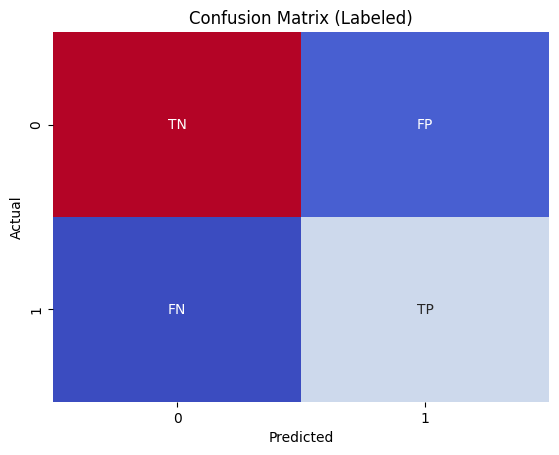

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred_final)
labels = np.array([["TN", "FP"], ["FN", "TP"]])
sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix (Labeled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


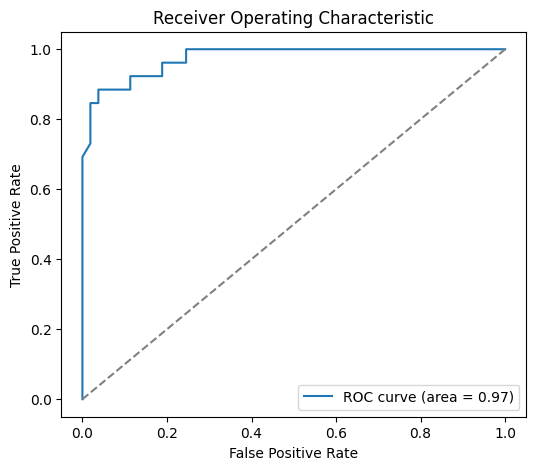

In [38]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [39]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"{name:20s} F1 = {f1:.3f}")


Logistic Regression  F1 = 0.875
Decision Tree        F1 = 0.800
Random Forest        F1 = 0.852


In [40]:
import joblib

joblib.dump(best_model, "semma_student_risk_model.pkl")
print("✅ Model saved successfully.")


✅ Model saved successfully.
